In [1]:
import cv2
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Task 01

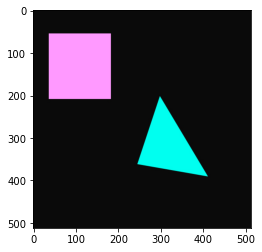

In [2]:
# original image
image = cv2.imread('2ob.jpg', 1)
plt.imshow(image)

In [3]:
#add noise
noise = np.zeros((512, 512, 3), dtype=np.uint8)
cv2.randn(noise, 0, 100)
noiseImage = cv2.add(image, noise)

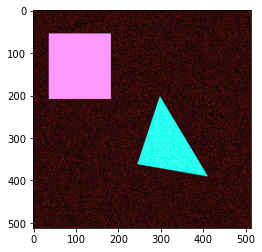

In [4]:
plt.imshow(noiseImage)

In [5]:
th = 0
max_val = 255

110.0


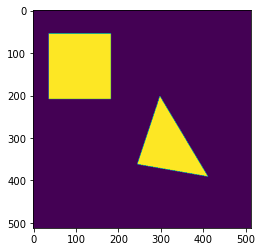

In [7]:
#Otsu’s algorithm 
noiseImage = noiseImage.astype("uint8")
gray_image = cv2.cvtColor(noiseImage, cv2.COLOR_BGR2GRAY)
thresh, img = cv2.threshold(gray_image, th, max_val, cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print(thresh)
plt.imshow(img)